# CASE STUDY PART II #

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)

source_dir= "./datasets"

Loading datasets into pandas dataframe

In [4]:
application_df= pd.read_csv(f'{source_dir}/application_data.csv')
prev_application_df= pd.read_csv(f'{source_dir}/previous_application.csv')

Checking the total record and column count

In [5]:
prev_application_df.shape

(1670214, 37)

In [6]:
prev_application_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


### Analysing previous application dataset ###

In [7]:
print(prev_application_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

### Check for records with all null values ###

In [8]:
prev_application_df.isnull().all(axis=1).sum()

0

#### Check for columns with higher missing value percentage ####

In [163]:
round((prev_application_df.isnull().sum()/len(prev_application_df.index))*100,4).sort_values(ascending=False).head(15)

RATE_INTEREST_PRIVILEGED     99.6437
RATE_INTEREST_PRIMARY        99.6437
RATE_DOWN_PAYMENT            53.6365
AMT_DOWN_PAYMENT             53.6365
NAME_TYPE_SUITE              49.1198
DAYS_TERMINATION             40.2981
NFLAG_INSURED_ON_APPROVAL    40.2981
DAYS_FIRST_DRAWING           40.2981
DAYS_FIRST_DUE               40.2981
DAYS_LAST_DUE_1ST_VERSION    40.2981
DAYS_LAST_DUE                40.2981
AMT_GOODS_PRICE              23.0818
AMT_ANNUITY                  22.2867
CNT_PAYMENT                  22.2864
PRODUCT_COMBINATION           0.0207
dtype: float64

#### Dropping rows and columns with higher missing value percentage and not so significant for our analysis ####

In [31]:
#app_cleaned_df= prev_application_df[[col for col in application_df.columns if application_df[col].isnull().mean() < 0.45]].copy()
prev_cleaned_df= prev_application_df.loc[prev_application_df['NAME_CONTRACT_TYPE'] != 'XNA']
prev_cleaned_df.shape

(1669868, 37)

### Imputing values ###

Removing outliers and imputing values have been handled before the plotting

### Create derived column which could be useful for analysis ###

In [139]:
prev_cleaned_df.loc[:, 'DAYS_DECISION']=prev_cleaned_df.loc[:,'DAYS_DECISION'].abs()
prev_cleaned_df.loc[:, 'WEEKDAY']= prev_cleaned_df['WEEKDAY_APPR_PROCESS_START'].apply(lambda x: 'WEEKEND' if x in('SATURDAY', 'SUNDAY') else 'WEEKDAY')



### Find distribution percentage of clients applied for different loan applications ###

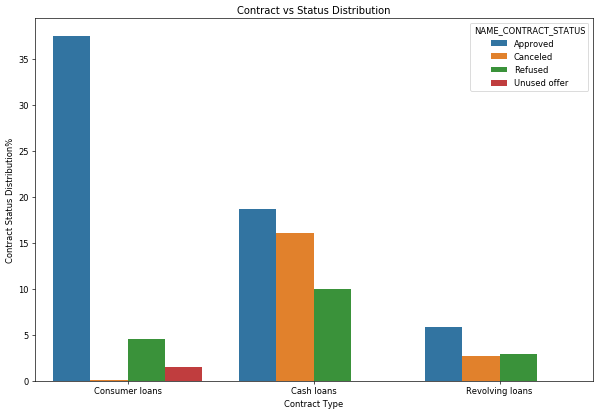

In [96]:
plt.figure(figsize=(12,8), dpi=60)
sns.barplot(y='SK_ID_PREV', x='NAME_CONTRACT_TYPE', hue= 'NAME_CONTRACT_STATUS', data=pd.DataFrame(round(prev_cleaned_df.groupby(['NAME_CONTRACT_TYPE', 'NAME_CONTRACT_STATUS']).SK_ID_PREV.count()
                                                                 /len(prev_cleaned_df.index)*100,2)).sort_values(by=['SK_ID_PREV'], ascending=False).reset_index())
#plt.yscale('log')
plt.ylabel('Contract Status Distribution%')
plt.xlabel('Contract Type')
plt.title('Contract vs Status Distribution')
plt.show()

#### Create dataframe to do univariate analysis for categorical variables and plot them to see their distribution ####

In [97]:
categorical_df= prev_cleaned_df[['NAME_CONTRACT_TYPE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE'
                                , 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY']]


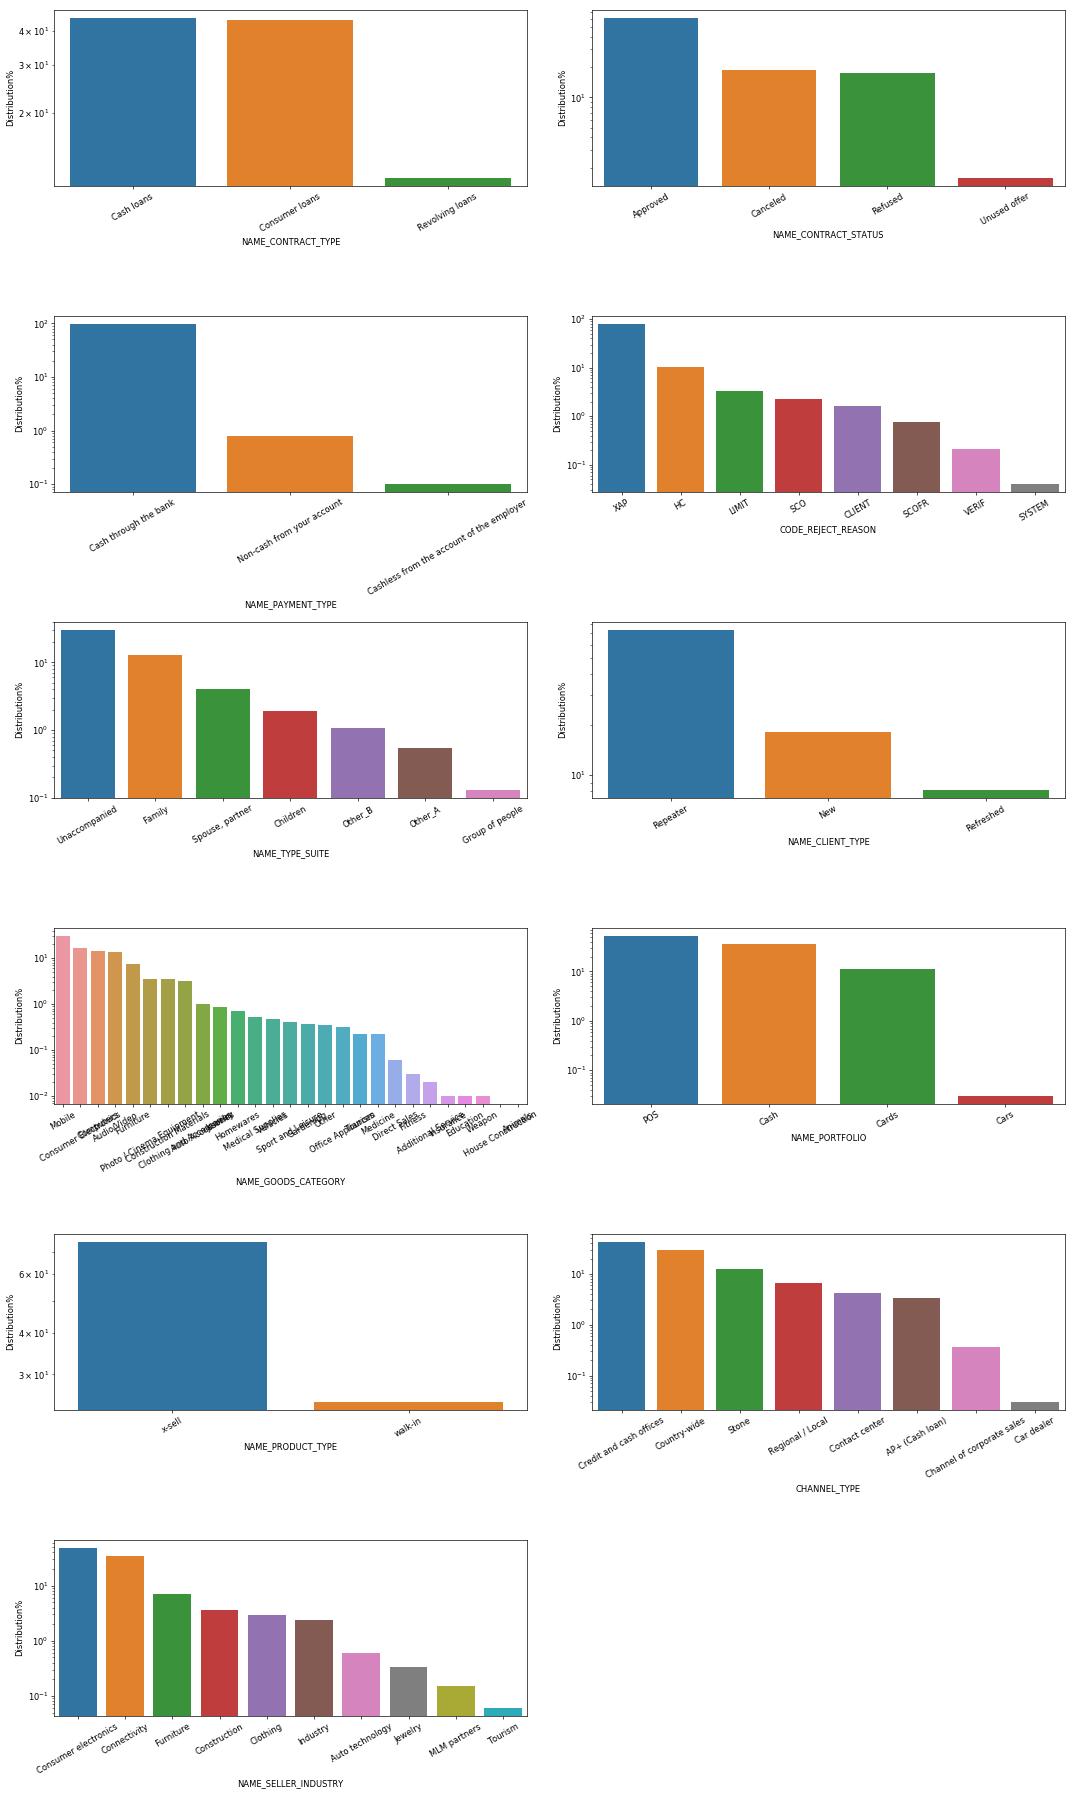

In [149]:
#i=len(list(categorical_df.columns)[1:])
j=0

plt.figure(figsize=(18,30), dpi=60)
plt.figure(1)
for column in list(categorical_df.columns):
    j+=1    
    
    plt.subplot(6, 2, j)
    
    #Remove "XNA" value from column runtime before plotting distribution
    prev_cleaned_df1= prev_cleaned_df.loc[prev_cleaned_df[column] != 'XNA']
    
    sns.barplot(y='SK_ID_PREV', x=column, data=pd.DataFrame(round(prev_cleaned_df1.groupby(column).SK_ID_PREV.count()
                                   /len(prev_cleaned_df1.index)*100,2)).sort_values(by=['SK_ID_PREV'], ascending=False).reset_index())
    
    plt.ylabel('Distribution%')
    plt.xticks(rotation=390)
    plt.yscale('log')
    #plt.title(column)

plt.tight_layout()
plt.show()

#### Create dataframe to do univariate analysis for quantitative variables and plot them to see their distribution ####

In [98]:
quant_df= prev_cleaned_df[['DAYS_DECISION', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT'
                          , 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED']]


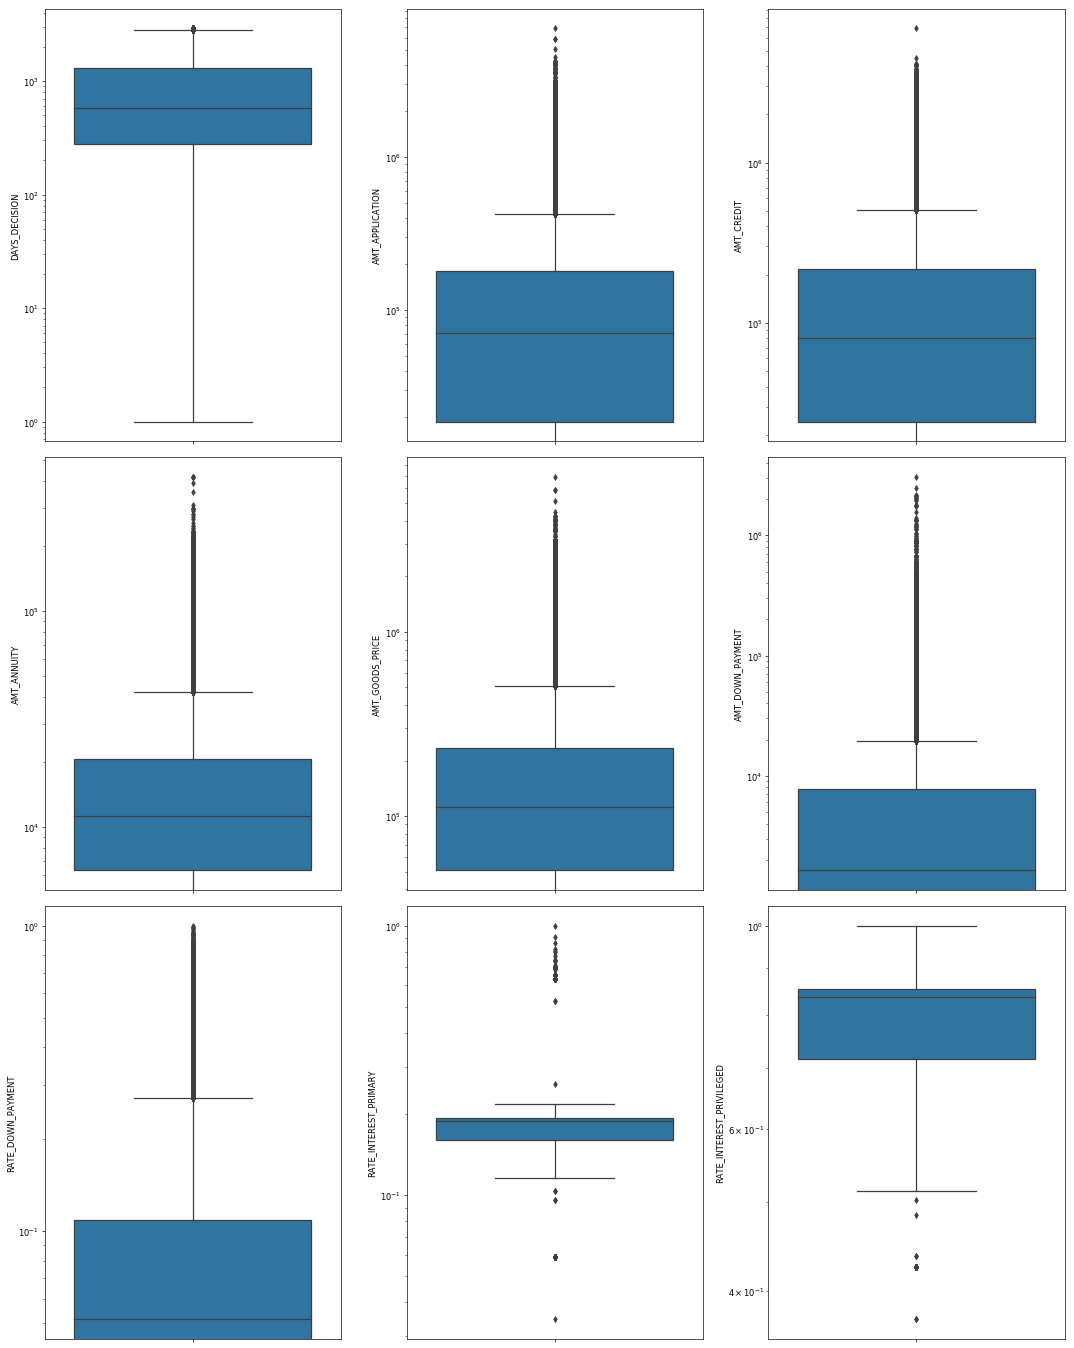

In [100]:
#i=(len(list(categorical_df.columns)[1:])//3)+1
j=0

plt.figure(figsize=(18,30), dpi=60)
plt.figure(1)
for column in list(quant_df.columns):
    j+=1
        
    plt.subplot(4, 3, j)
    quant_df.loc[:, column] = quant_df.loc[:, column].astype('float')
    sns.boxplot(y=quant_df[column])
    plt.yscale('log')
    #plt.title(column)

plt.tight_layout()
plt.show()

#### Segmented univariate Analysis with Target variable ####

##### Distribution% on total population #####

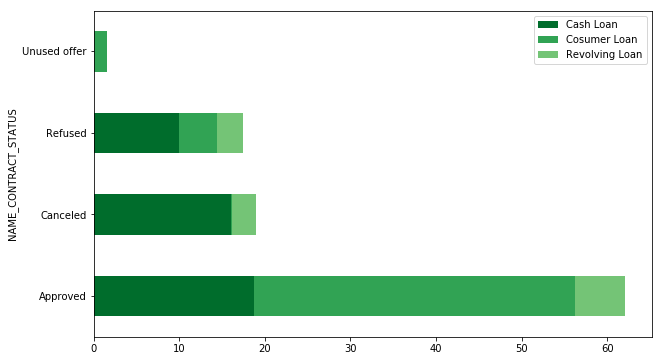

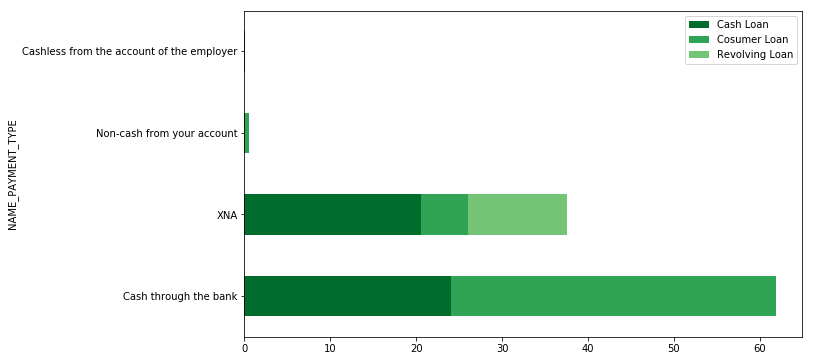

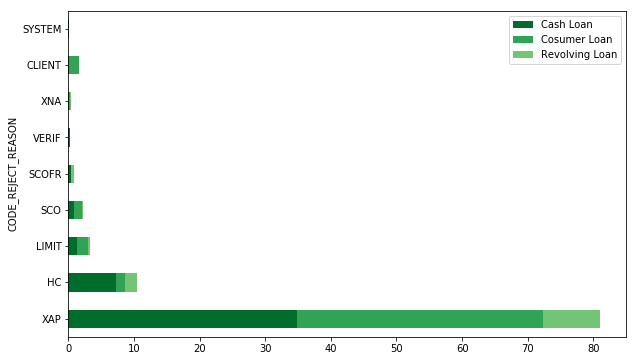

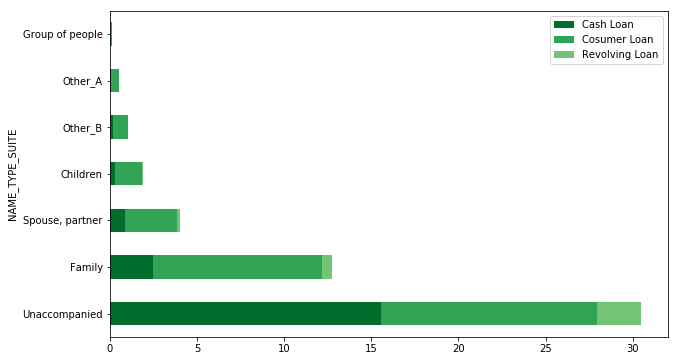

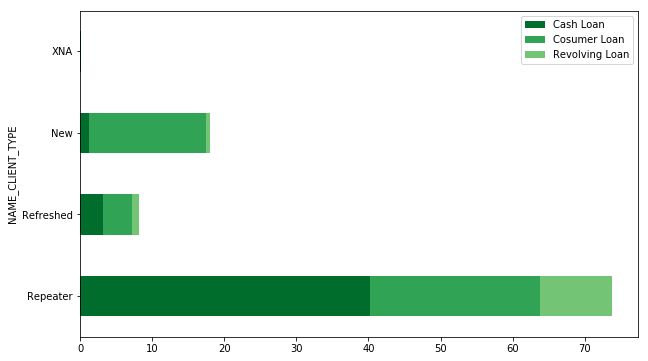

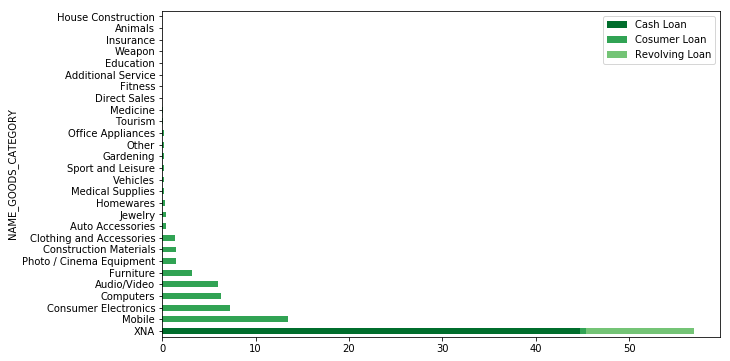

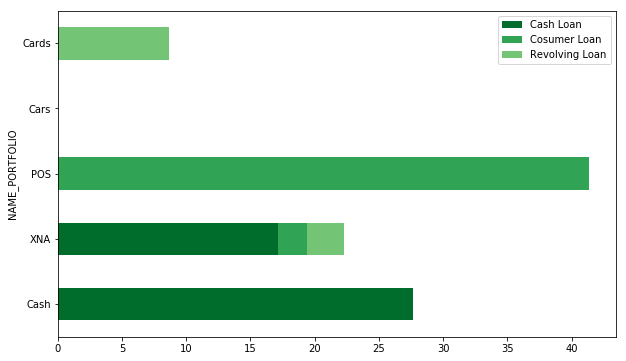

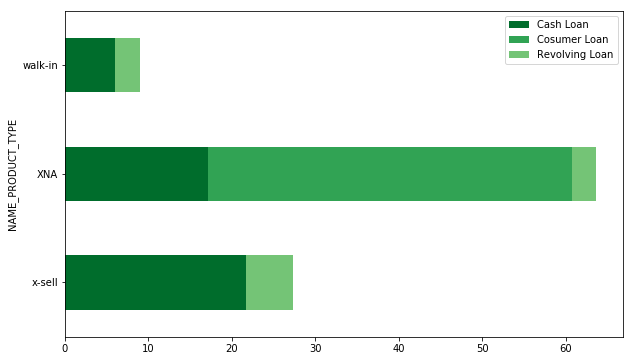

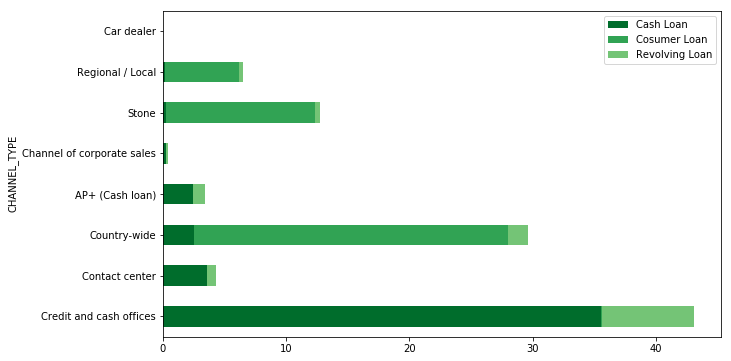

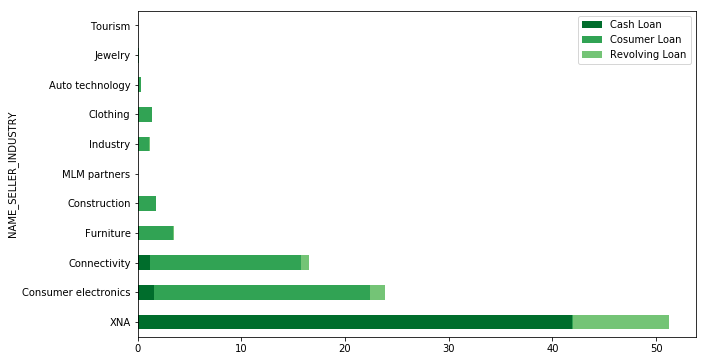

In [218]:
func = lambda x: 100*x.count()/prev_cleaned_df.shape[0]

#i=len(list(categorical_df.columns)[1:])
j=0

#plt.figure(figsize=(6,6), dpi=60)
colors = ["#006D2C", "#31A354","#74C476"]
#plt.figure(1)
for column in list(categorical_df.columns)[1:]:
    #plt.figure(i)
    j+=1
    
    #Remove "XNA" value from column runtime before plotting distribution
    #prev_cleaned_df2= prev_cleaned_df.loc[prev_cleaned_df[column] != 'XNA']
    
    prev_pivot_df1 = pd.DataFrame(prev_cleaned_df.pivot_table(index=column, columns=['NAME_CONTRACT_TYPE'], values=['SK_ID_PREV'], aggfunc=func).to_records())
    prev_pivot_df1.columns= [column, 'Cash Loan', 'Cosumer Loan', 'Revolving Loan']
    prev_pivot_df1.sort_values(by=['Cash Loan', 'Cosumer Loan', 'Revolving Loan'], ascending=False, inplace=True)
    
    
    prev_pivot_df1.set_index(column).plot.barh(stacked=True, color=colors, figsize=(10,6))
    #plt.xscale('log')
    #plt.xticks(rotation=300)
    plt.show()

###### On particular class or type of population ######

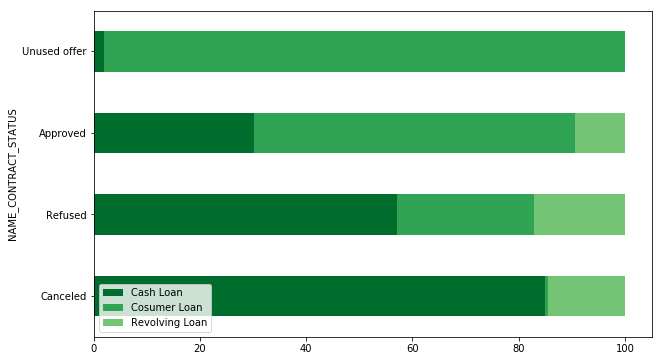

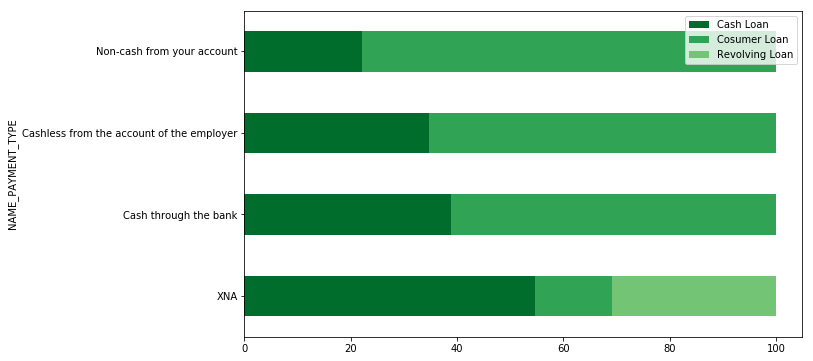

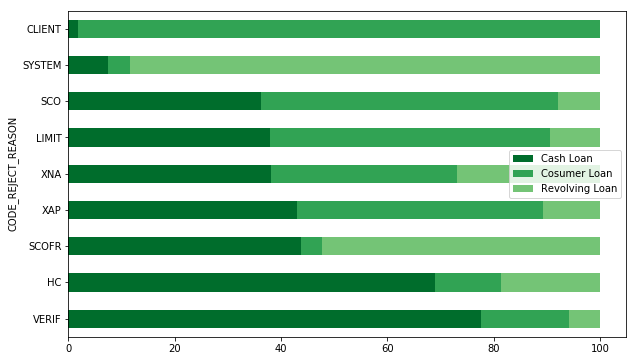

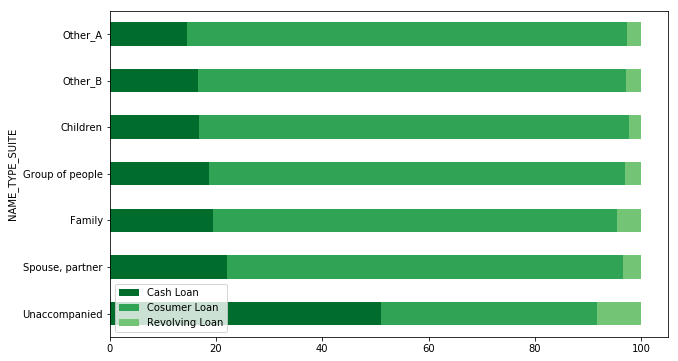

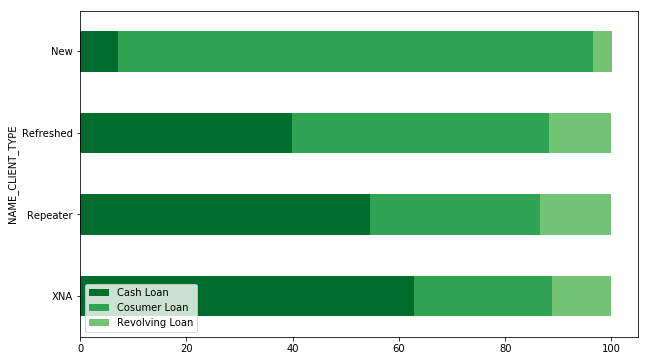

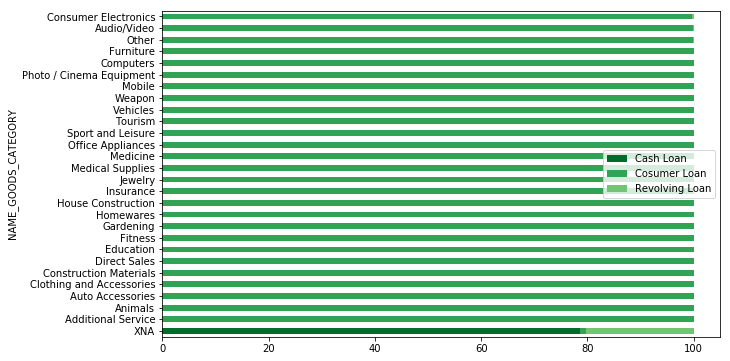

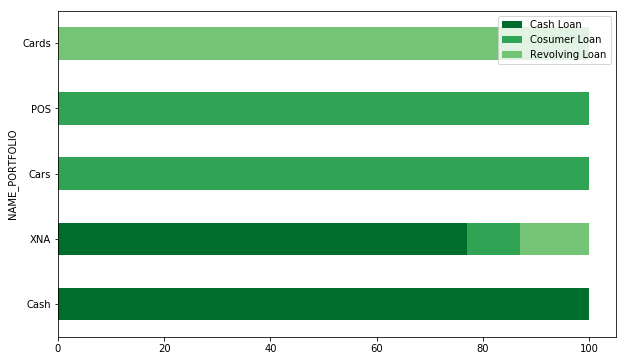

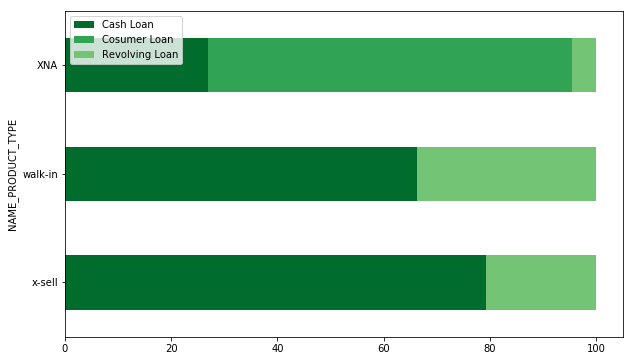

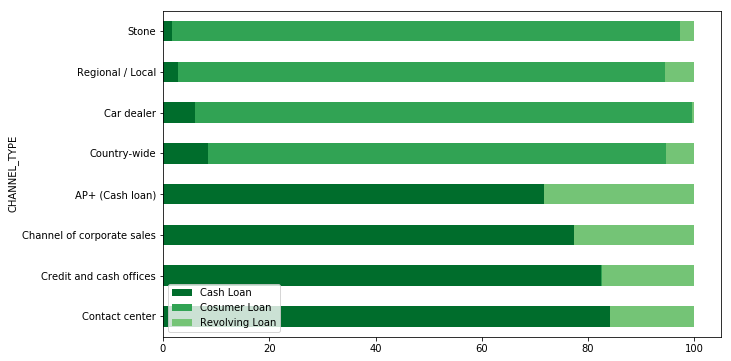

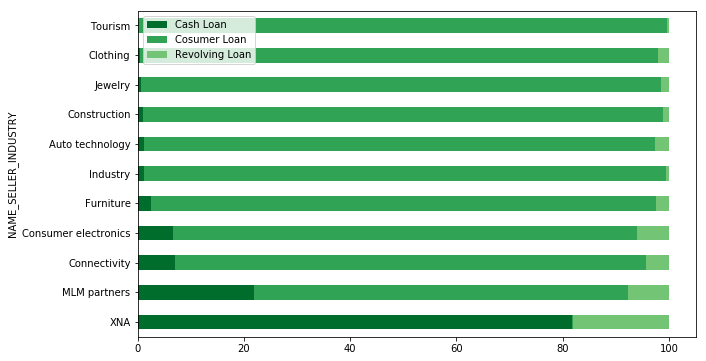

In [223]:
#categorical_df1= app_cleaned_df[['TARGET', 'NAME_INCOME_TYPE']]
j=0

colors = ["#006D2C", "#31A354","#74C476"]

for column in list(categorical_df.columns)[1:]:
    j+=1
    
    df1= prev_cleaned_df.pivot_table(index=column, columns=['NAME_CONTRACT_TYPE'], values=['SK_ID_PREV'], aggfunc=len, margins=True, dropna=True, fill_value=0)
    df2= pd.DataFrame(round(df1.div( df1.iloc[:,-1], axis=0 )*100,2).to_records()).iloc[:-1, :-1]
    df2.columns= [column, 'Cash Loan', 'Cosumer Loan', 'Revolving Loan']
    df2.sort_values(by=['Cash Loan', 'Cosumer Loan', 'Revolving Loan'], ascending=False, inplace=True)
    
    df2.set_index(column).plot.barh(stacked=True, color=colors, figsize=(10,6))
    #plt.xscale('log')
    #plt.xticks(rotation=300)
    plt.show()

#### Segmented univariate Analysis with quantitative & categorical variable ####

##### Find if days to decision has any pattern in loan approval for different loan and customer type #####

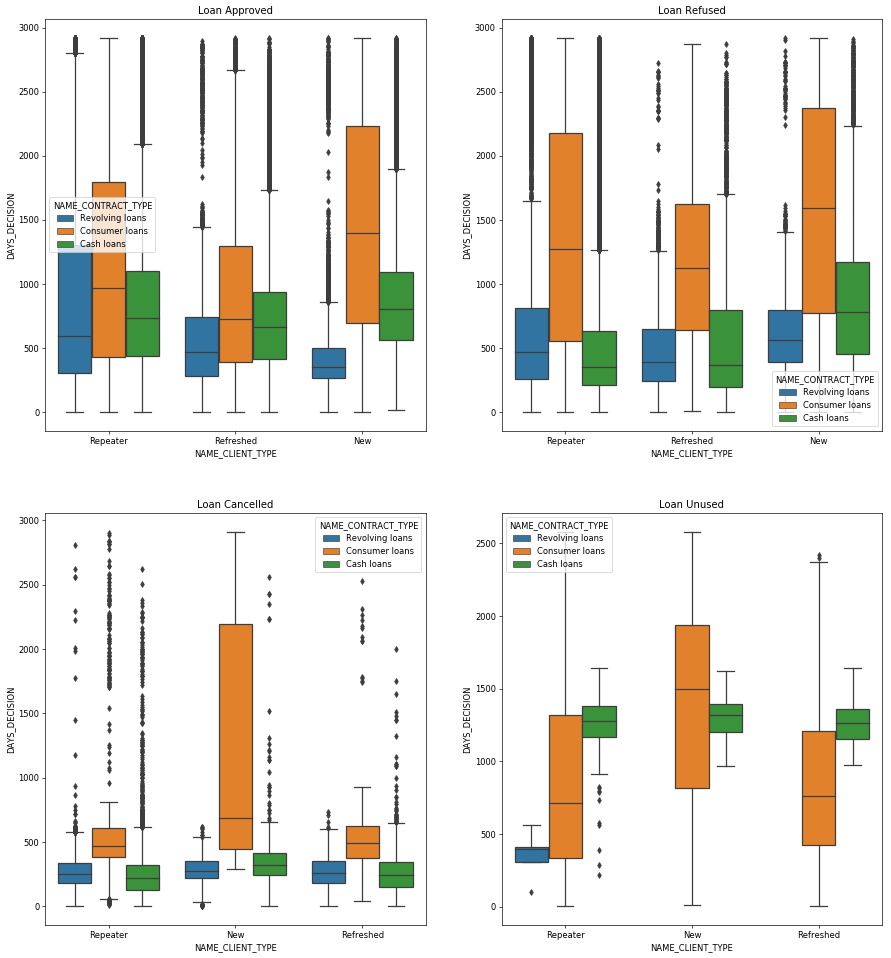

In [102]:
plt.figure(figsize=(18,20), dpi=60)
plt.figure(1)
plt.subplot(2, 2, 1)
sns.boxplot(y='DAYS_DECISION', x='NAME_CLIENT_TYPE', hue='NAME_CONTRACT_TYPE'
           , data=prev_cleaned_df.loc[(prev_cleaned_df['NAME_CONTRACT_STATUS'].isin(['Approved']))
                                     & (prev_cleaned_df['NAME_CLIENT_TYPE']!='XNA')].sort_values(by=['NAME_CONTRACT_TYPE'], ascending=False))
plt.title('Loan Approved')
#plt.yscale('log')

plt.subplot(2, 2, 2)
sns.boxplot(y='DAYS_DECISION', x='NAME_CLIENT_TYPE', hue='NAME_CONTRACT_TYPE'
           , data=prev_cleaned_df.loc[(prev_cleaned_df['NAME_CONTRACT_STATUS'].isin(['Refused']))
                                     & (prev_cleaned_df['NAME_CLIENT_TYPE']!='XNA')].sort_values(by=['NAME_CONTRACT_TYPE'], ascending=False))
plt.title('Loan Refused')
#plt.yscale('log')

plt.subplot(2, 2, 3)
sns.boxplot(y='DAYS_DECISION', x='NAME_CLIENT_TYPE', hue='NAME_CONTRACT_TYPE'
           , data=prev_cleaned_df.loc[(prev_cleaned_df['NAME_CONTRACT_STATUS'].isin(['Canceled']))
                                     & (prev_cleaned_df['NAME_CLIENT_TYPE']!='XNA')].sort_values(by=['NAME_CONTRACT_TYPE'], ascending=False))
plt.title('Loan Cancelled')
#plt.yscale('log')

plt.subplot(2, 2, 4)
sns.boxplot(y='DAYS_DECISION', x='NAME_CLIENT_TYPE', hue='NAME_CONTRACT_TYPE'
           , data=prev_cleaned_df.loc[(prev_cleaned_df['NAME_CONTRACT_STATUS'].isin(['Unused offer']))
                                     & (prev_cleaned_df['NAME_CLIENT_TYPE']!='XNA')].sort_values(by=['NAME_CONTRACT_TYPE'], ascending=False))
plt.title('Loan Unused')
#plt.yscale('log')

plt.show()

##### Find if approved amount limit changes for different loan and customer type #####

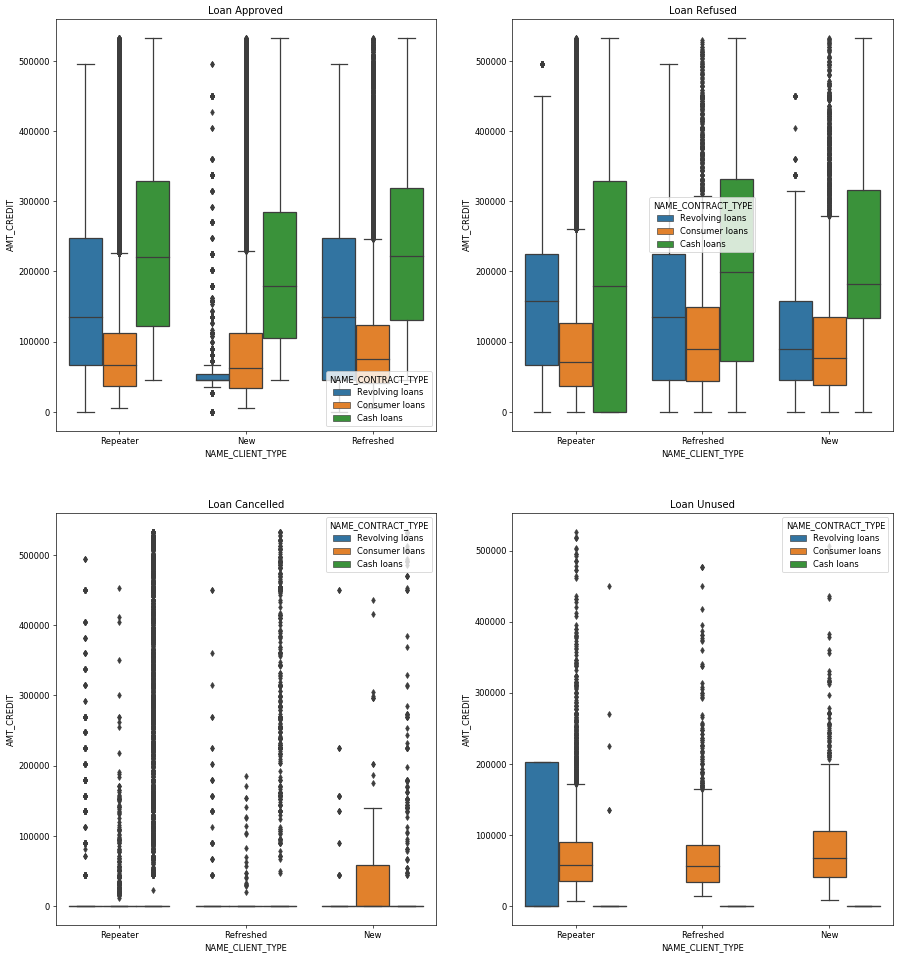

In [103]:
plt.figure(figsize=(18,20), dpi=60)
plt.figure(1)
plt.subplot(2, 2, 1)
sns.boxplot(y='AMT_CREDIT', x='NAME_CLIENT_TYPE', hue='NAME_CONTRACT_TYPE'
           , data=prev_cleaned_df.loc[(prev_cleaned_df['AMT_CREDIT'] <= prev_cleaned_df['AMT_CREDIT'].quantile(0.9)) 
                                     & (prev_cleaned_df['NAME_CONTRACT_STATUS'].isin(['Approved']))
                                     & (prev_cleaned_df['NAME_CLIENT_TYPE']!='XNA')].sort_values(by=['NAME_CONTRACT_TYPE'], ascending=False))
plt.title('Loan Approved')
#plt.yscale('log')

plt.subplot(2, 2, 2)
sns.boxplot(y='AMT_CREDIT', x='NAME_CLIENT_TYPE', hue='NAME_CONTRACT_TYPE'
           , data=prev_cleaned_df.loc[(prev_cleaned_df['AMT_CREDIT'] <= prev_cleaned_df['AMT_CREDIT'].quantile(0.9))
                                     & (prev_cleaned_df['NAME_CONTRACT_STATUS'].isin(['Refused']))
                                     & (prev_cleaned_df['NAME_CLIENT_TYPE']!='XNA')].sort_values(by=['NAME_CONTRACT_TYPE'], ascending=False))
plt.title('Loan Refused')
#plt.yscale('log')

plt.subplot(2, 2, 3)
sns.boxplot(y='AMT_CREDIT', x='NAME_CLIENT_TYPE', hue='NAME_CONTRACT_TYPE'
           , data=prev_cleaned_df.loc[(prev_cleaned_df['AMT_CREDIT'] <= prev_cleaned_df['AMT_CREDIT'].quantile(0.9))
                                     & (prev_cleaned_df['NAME_CONTRACT_STATUS'].isin(['Canceled']))
                                     & (prev_cleaned_df['NAME_CLIENT_TYPE']!='XNA')].sort_values(by=['NAME_CONTRACT_TYPE'], ascending=False))
plt.title('Loan Cancelled')
#plt.yscale('log')

plt.subplot(2, 2, 4)
sns.boxplot(y='AMT_CREDIT', x='NAME_CLIENT_TYPE', hue='NAME_CONTRACT_TYPE'
           , data=prev_cleaned_df.loc[(prev_cleaned_df['AMT_CREDIT'] <= prev_cleaned_df['AMT_CREDIT'].quantile(0.9))
                                     & (prev_cleaned_df['NAME_CONTRACT_STATUS'].isin(['Unused offer']))
                                     & (prev_cleaned_df['NAME_CLIENT_TYPE']!='XNA')].sort_values(by=['NAME_CONTRACT_TYPE'], ascending=False))
plt.title('Loan Unused')
#plt.yscale('log')

plt.show()

## Splitting dataset into 3 dataframes - Approved, Cancelled & Refused ##

### Splitting previous application dataset which Approved ###

In [141]:
prev_approved_df= prev_cleaned_df.loc[(prev_cleaned_df['NAME_CONTRACT_STATUS'] == 'Approved')].copy()
prev_approved_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,WEEKDAY
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0,WEEKEND
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0,WEEKDAY
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0,WEEKDAY
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0,WEEKDAY
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,Y,1,NaN,NaN,NaN,Everyday expenses,Approved,684,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0,WEEKEND


#### Perform bivariate analysis to find the correlation between categorical variables ####

In [160]:
#Create a list of possible combinations on which we will be doing our analysis, 3rd paramter is for yscale(log) yes or no

bi_cat_list= [['NAME_CONTRACT_TYPE', 'NAME_PAYMENT_TYPE', 'Y'], ['NAME_CONTRACT_TYPE', 'NAME_CLIENT_TYPE', 'N']
              , ['CHANNEL_TYPE', 'NAME_CLIENT_TYPE', 'N'], ['NAME_CONTRACT_TYPE', 'NAME_PORTFOLIO', 'Y']
              , ['WEEKDAY_APPR_PROCESS_START', 'CHANNEL_TYPE', 'N'], ['NAME_YIELD_GROUP', 'NAME_CONTRACT_TYPE', 'N']]


#### Distribution On total population ####

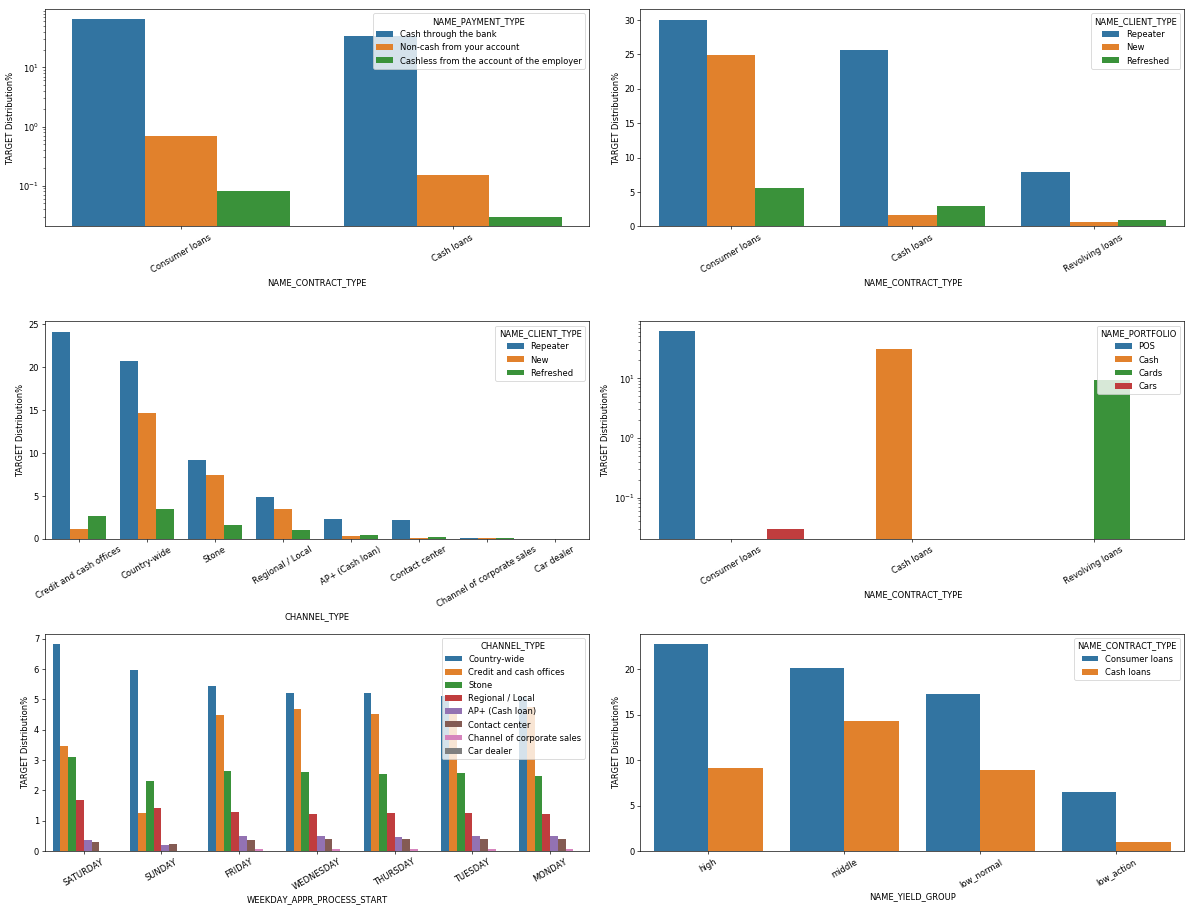

In [185]:
#i=len(list(categorical_df.columns)[1:])
j=0

plt.figure(figsize=(20,30), dpi=60)
plt.figure(1)
for column_list in bi_cat_list:
    j+=1  
    
    plt.subplot(6, 2, j)
    
    #Remove "XNA" value from column runtime before plotting distribution
    prev_approved_df1= prev_approved_df.loc[(prev_approved_df[column_list[0]] != 'XNA') & (prev_approved_df[column_list[1]] != 'XNA')]
    
    sns.barplot(y='SK_ID_PREV', x=column_list[0], hue=column_list[1]
                , data=pd.DataFrame(round(prev_approved_df1.groupby(column_list[:2]).SK_ID_PREV.count()/len(prev_approved_df1.index)*100,2))
                .sort_values(by=['SK_ID_PREV'], ascending=False).reset_index())
    
    plt.ylabel('TARGET Distribution%')
    plt.xticks(rotation=390)
    
    #use log scale for given parameters
    if column_list[2]=='Y':
        plt.yscale('log')
        
    #plt.title(column)

plt.tight_layout()
plt.show()

#### Types of goods having higher interest rate ####

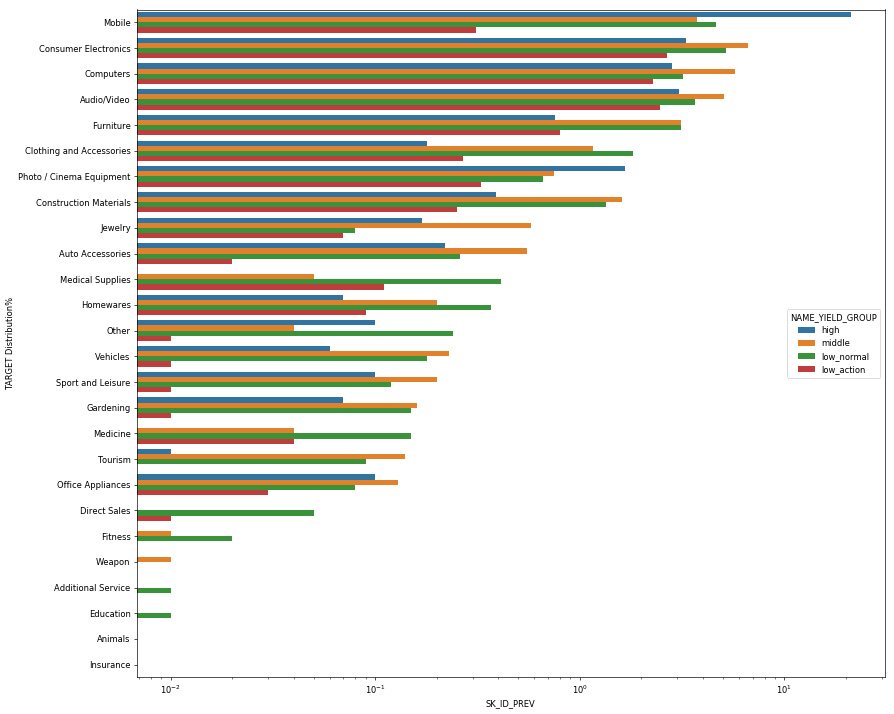

In [220]:
prev_approved_df2= prev_approved_df.loc[(prev_approved_df['NAME_GOODS_CATEGORY'] != 'XNA') & (prev_approved_df['NAME_YIELD_GROUP'] != 'XNA')]

plt.figure(figsize=(15,12), dpi=60)
sns.barplot(x='SK_ID_PREV', y='NAME_GOODS_CATEGORY', hue='NAME_YIELD_GROUP'
                , data=pd.DataFrame(round(prev_approved_df2.groupby(['NAME_GOODS_CATEGORY', 'NAME_YIELD_GROUP']).SK_ID_PREV.count()/len(prev_approved_df2.index)*100,2))
                .sort_values(by=['SK_ID_PREV'], ascending=False).reset_index())
    
plt.ylabel('TARGET Distribution%')
#plt.xticks(rotation=390)
plt.xscale('log')
#plt.title(column)

plt.tight_layout()
plt.show()

##### Dsitribution on particular class or type of population #####

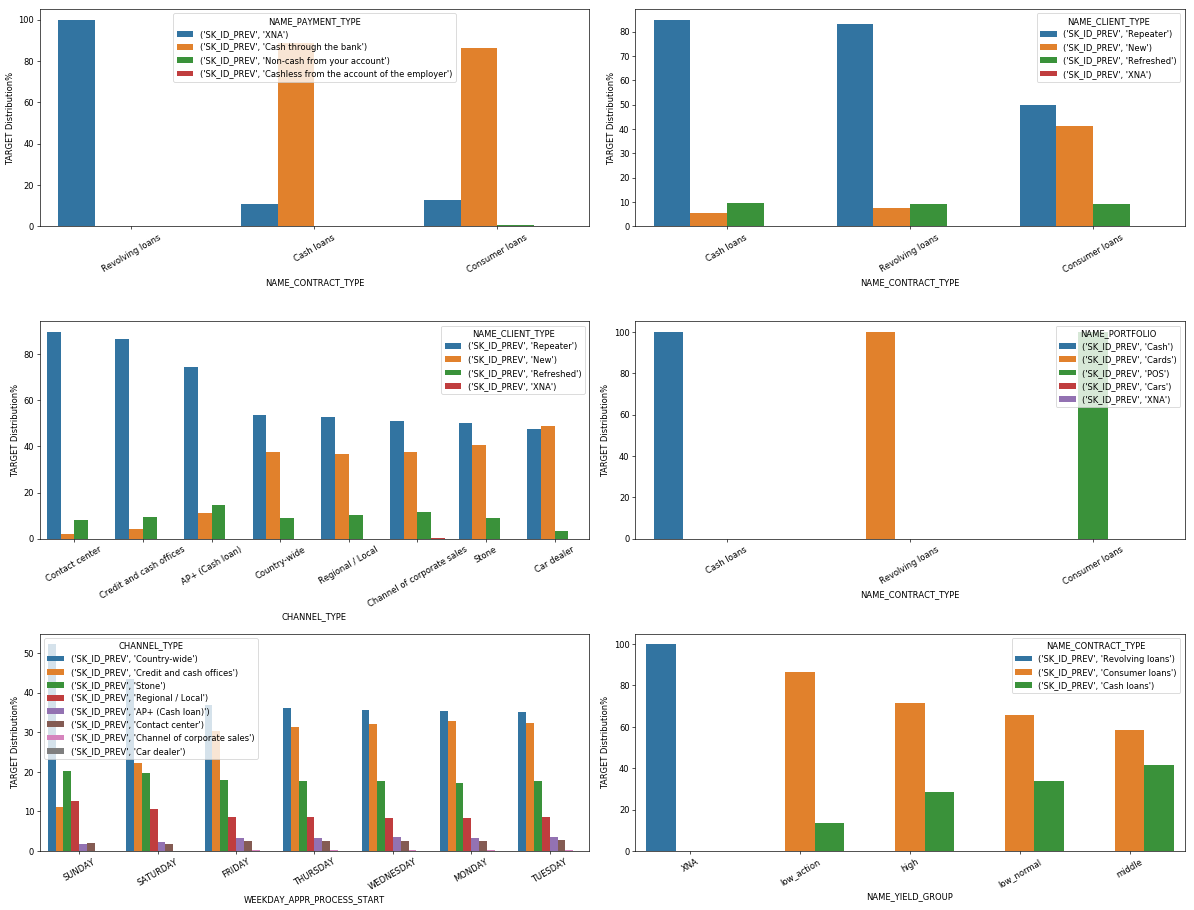

In [226]:
#i=len(list(categorical_df.columns)[1:])
j=0

plt.figure(figsize=(20,30), dpi=60)
plt.figure(1)
for column_list in bi_cat_list:
    j+=1  
    
    plt.subplot(6, 2, j)
    
    pivot_appdf1= prev_approved_df.pivot_table(index=column_list[0], columns=column_list[1]
                                          , values=['SK_ID_PREV'], aggfunc=len, margins=True, dropna=True, fill_value=0)
    pivot_appdf2= pd.DataFrame(round(pivot_appdf1.div( pivot_appdf1.iloc[:,-1], axis=0 )*100,2).to_records()).iloc[:-1, :-1]

    pivot_appdf3= pivot_appdf2.melt(id_vars=column_list[0], var_name=column_list[1], value_name="Target")

    sns.barplot(y='Target', x=column_list[0], hue=column_list[1]
                , data=pd.DataFrame(pivot_appdf3.groupby(column_list[:2]).Target.mean())
                .sort_values(by=['Target'], ascending=False).reset_index())
    
    plt.ylabel('TARGET Distribution%')
    plt.xticks(rotation=390)
    #plt.yscale('log')
    #plt.title(column)

plt.tight_layout()
plt.show()


#### Perform bivariate analysis to find the correlation between numerical variables ####

##### Identifying Outliers and removing them at the time of plotting #####

In [165]:
print('90th percentile value of Loan application amount is {0}'.format(prev_approved_df['AMT_APPLICATION'].quantile(0.9)))
print('90th percentile value of Loan annuity is {0}'.format(prev_approved_df['AMT_ANNUITY'].quantile(0.9)))
print('90th percentile value of Credit amount is {0}'.format(prev_approved_df['AMT_CREDIT'].quantile(0.9)))
print('90th percentile value of price of the goods is {0}'.format(prev_approved_df['AMT_GOODS_PRICE'].quantile(0.90)))
print('90th percentile value of down payment amount is {0}'.format(prev_approved_df['AMT_DOWN_PAYMENT'].quantile(0.90)))

90th percentile value of Loan application amount is 450000.0
90th percentile value of Loan annuity is 31100.62500000005
90th percentile value of Credit amount is 498150.0
90th percentile value of price of the goods is 450000.0
90th percentile value of down payment amount is 17811.0


##### Find correlation between 1st set of variables #####

In [168]:
prev_appramt_df= prev_approved_df[['AMT_APPLICATION', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'AMT_DOWN_PAYMENT', 'DAYS_DECISION']].copy()

#Filtering out outliers with 90th quantile value
prev_appramt_df= prev_appramt_df.loc[(prev_appramt_df['AMT_APPLICATION'] <= prev_appramt_df['AMT_APPLICATION'].quantile(0.9))
                               & (prev_appramt_df['AMT_CREDIT'] <= prev_appramt_df['AMT_CREDIT'].quantile(0.9))
                               & (prev_appramt_df['AMT_ANNUITY'] <= prev_appramt_df['AMT_ANNUITY'].quantile(0.9))
                               & (prev_appramt_df['AMT_GOODS_PRICE'] <= prev_appramt_df['AMT_GOODS_PRICE'].quantile(0.9))
                               & (prev_appramt_df['AMT_DOWN_PAYMENT'] <= prev_appramt_df['AMT_DOWN_PAYMENT'].quantile(0.9))
                              ]

# pairplot
# sns.pairplot(prev_appramt_df)
# plt.show()

In [177]:
cor_prev_appramt = prev_appramt_df.corr()
round(cor_prev_appramt, 3)

,AMT_APPLICATION,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AMT_DOWN_PAYMENT,DAYS_DECISION
AMT_APPLICATION,1.000,0.991,0.758,1.000,-0.049,-0.196
AMT_CREDIT,0.991,1.000,0.746,0.991,-0.128,-0.205
AMT_ANNUITY,0.758,0.746,1.000,0.758,0.035,-0.187
AMT_GOODS_PRICE,1.000,0.991,0.758,1.000,-0.049,-0.196
AMT_DOWN_PAYMENT,-0.049,-0.128,0.035,-0.049,1.000,0.192
DAYS_DECISION,-0.196,-0.205,-0.187,-0.196,0.192,1.000


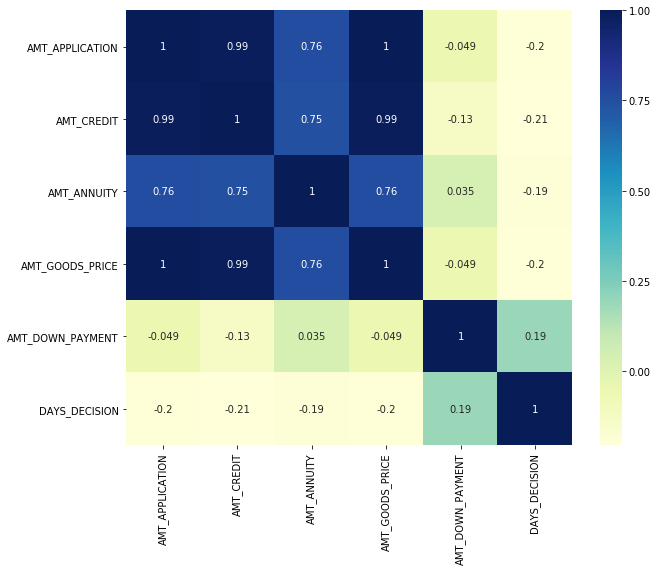

In [178]:
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(cor_prev_appramt, cmap="YlGnBu", annot=True)
plt.show()

##### Find correlation between 2nd set of selective variables #####

In [179]:
prev_apprrate_df= prev_approved_df.loc[prev_approved_df['NAME_CONTRACT_TYPE']=='Consumer loans', ['AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED']]

#Filtering out outliers with 90th quantile value
prev_apprrate_df= prev_apprrate_df.loc[(prev_apprrate_df['AMT_CREDIT'] <= prev_apprrate_df['AMT_CREDIT'].quantile(0.9))
                               & (prev_apprrate_df['AMT_DOWN_PAYMENT'] <= prev_apprrate_df['AMT_DOWN_PAYMENT'].quantile(0.9))
                              ]

# pairplot
# sns.pairplot(prev_appramt_df)
# plt.show()

In [181]:
cor_prev_apprrate = prev_apprrate_df.corr()
round(cor_prev_apprrate, 3)

,AMT_CREDIT,AMT_DOWN_PAYMENT,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED
AMT_CREDIT,1.000,0.076,-0.379,0.071,-0.183
AMT_DOWN_PAYMENT,0.076,1.000,0.741,-0.064,-0.232
RATE_DOWN_PAYMENT,-0.379,0.741,1.000,-0.105,-0.150
RATE_INTEREST_PRIMARY,0.071,-0.064,-0.105,1.000,0.019
RATE_INTEREST_PRIVILEGED,-0.183,-0.232,-0.150,0.019,1.000


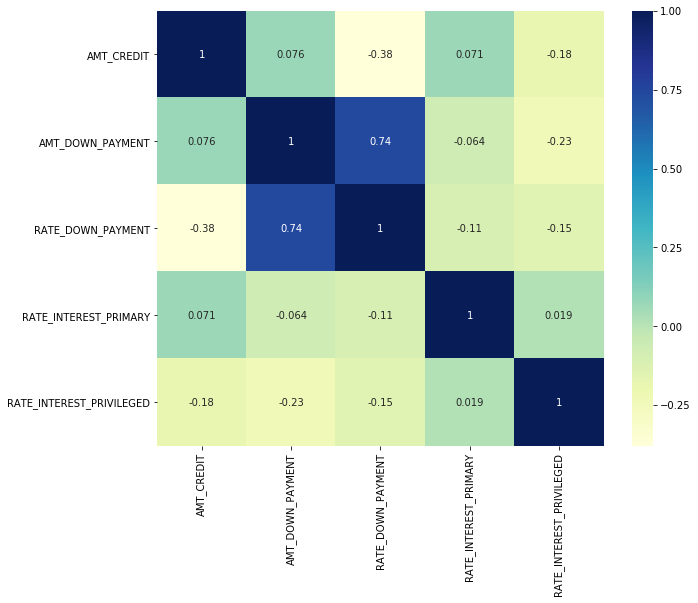

In [182]:
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(cor_prev_apprrate, cmap="YlGnBu", annot=True)
plt.show()

### Splitting previous application dataset which Refused ###

In [183]:
prev_refused_df= prev_cleaned_df.loc[(prev_cleaned_df['NAME_CONTRACT_STATUS'] == 'Refused')].copy()
prev_refused_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,WEEKDAY
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN,WEEKDAY
19,1173070,199178,Cash loans,4666.500,45000.0,49455.0,NaN,45000.0,SATURDAY,16,Y,1,NaN,NaN,NaN,Everyday expenses,Refused,584,XNA,HC,NaN,Repeater,XNA,Cash,walk-in,AP+ (Cash loan),6,XNA,18.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN,WEEKEND
20,1506815,166490,Cash loans,25454.025,450000.0,491580.0,NaN,450000.0,MONDAY,6,Y,1,NaN,NaN,NaN,XNA,Refused,401,Cash through the bank,HC,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,24.0,low_normal,Cash X-Sell: low,NaN,NaN,NaN,NaN,NaN,NaN,WEEKDAY
22,1172842,302212,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,9,Y,1,NaN,NaN,NaN,XNA,Refused,239,XNA,HC,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN,WEEKDAY
23,1172937,302212,Cash loans,39475.305,1129500.0,1277104.5,NaN,1129500.0,THURSDAY,5,Y,1,NaN,NaN,NaN,XNA,Refused,594,Cash through the bank,HC,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,54.0,low_normal,Cash X-Sell: low,NaN,NaN,NaN,NaN,NaN,NaN,WEEKDAY


#### Perform bivariate analysis to find the correlation between categorical variables ####

#### Distribution On total population ####

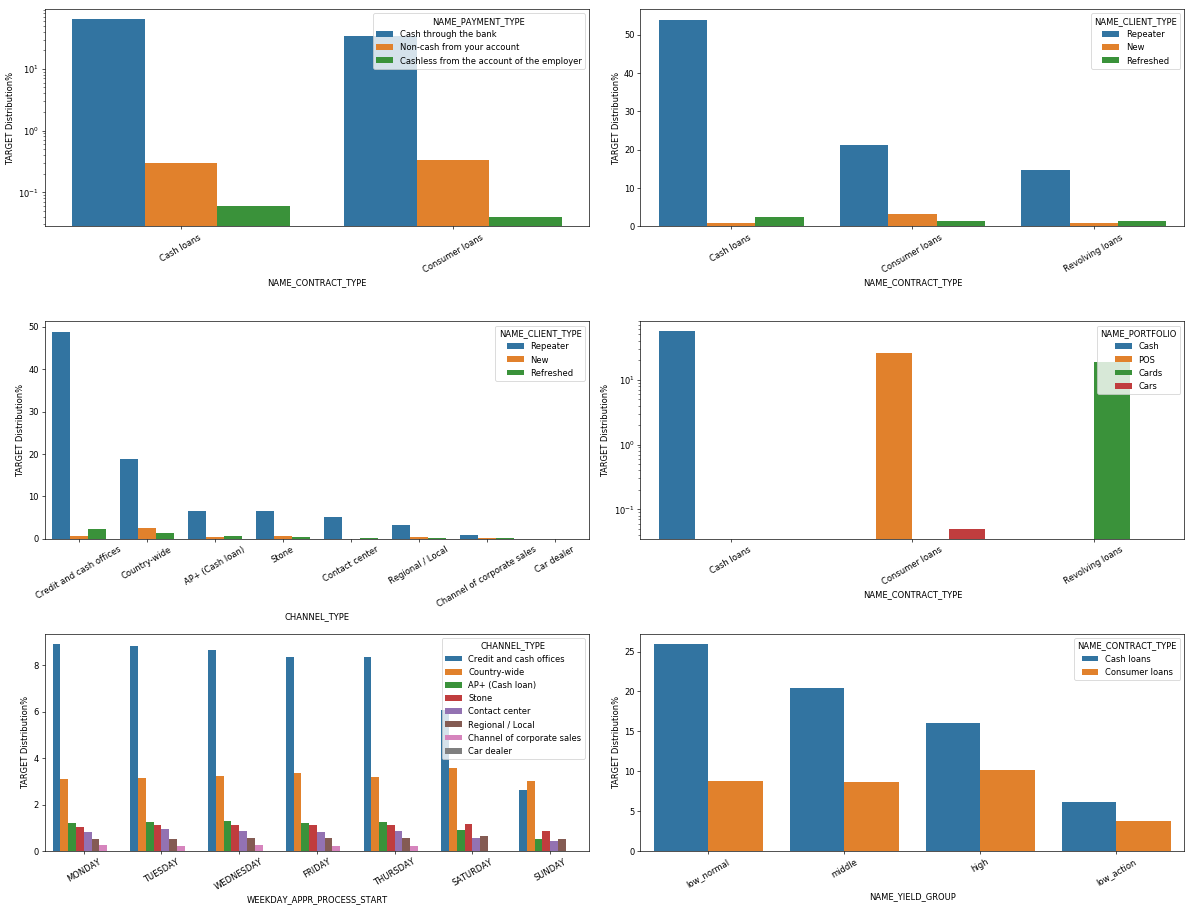

In [184]:
#i=len(list(categorical_df.columns)[1:])
j=0

plt.figure(figsize=(20,30), dpi=60)
plt.figure(1)
for column_list in bi_cat_list:
    j+=1  
    
    plt.subplot(6, 2, j)
    
    #Remove "XNA" value from column runtime before plotting distribution
    prev_refused_df1= prev_refused_df.loc[(prev_refused_df[column_list[0]] != 'XNA') & (prev_refused_df[column_list[1]] != 'XNA')]
    
    sns.barplot(y='SK_ID_PREV', x=column_list[0], hue=column_list[1]
                , data=pd.DataFrame(round(prev_refused_df1.groupby(column_list[:2]).SK_ID_PREV.count()/len(prev_refused_df1.index)*100,2))
                .sort_values(by=['SK_ID_PREV'], ascending=False).reset_index())
    
    plt.ylabel('TARGET Distribution%')
    plt.xticks(rotation=390)
    
    #use log scale for given parameters
    if column_list[2]=='Y':
        plt.yscale('log')
        
    #plt.title(column)

plt.tight_layout()
plt.show()

##### Distribution on particular class or type of population #####

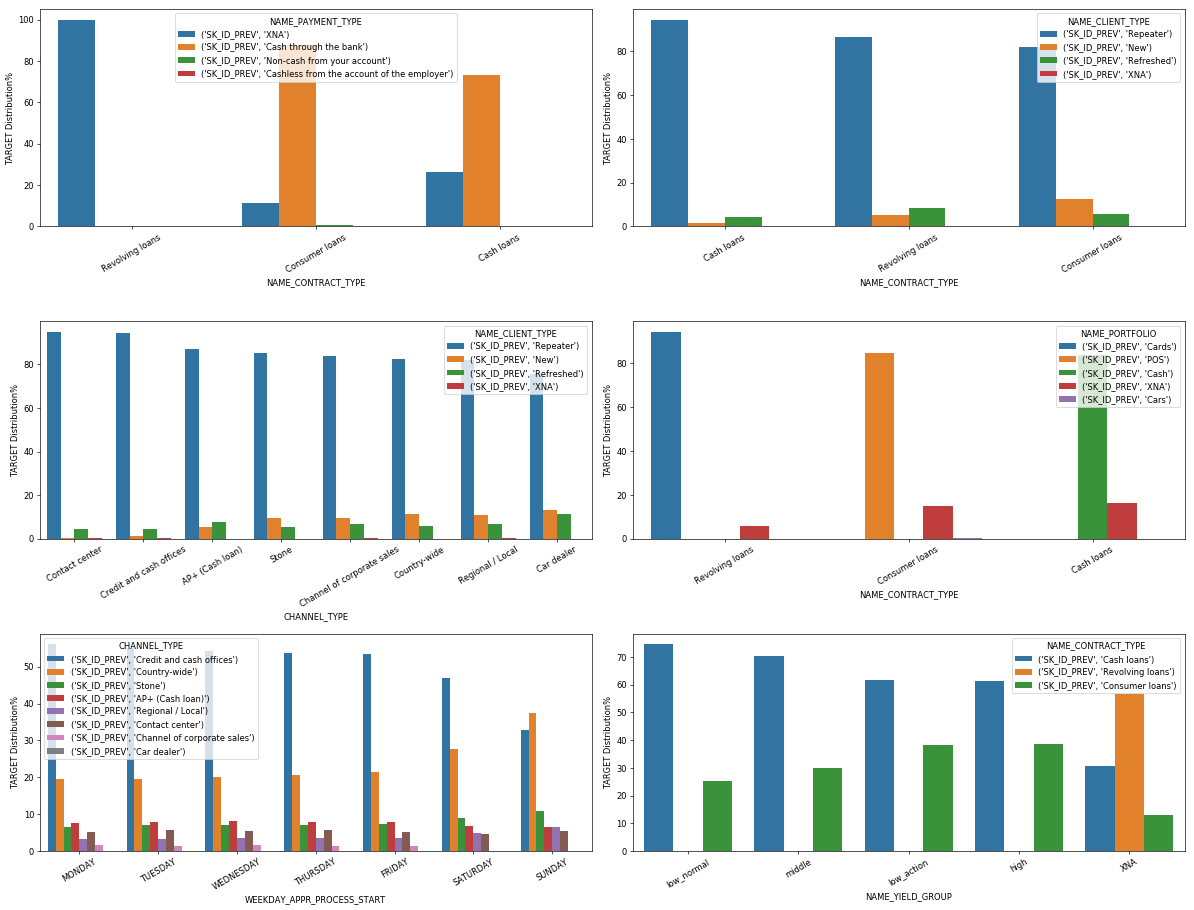

In [227]:
#i=len(list(categorical_df.columns)[1:])
j=0

plt.figure(figsize=(20,30), dpi=60)
plt.figure(1)
for column_list in bi_cat_list:
    j+=1  
    
    plt.subplot(6, 2, j)
    
    pivot_refudf1= prev_refused_df.pivot_table(index=column_list[0], columns=column_list[1]
                                          , values=['SK_ID_PREV'], aggfunc=len, margins=True, dropna=True, fill_value=0)
    pivot_refudf2= pd.DataFrame(round(pivot_refudf1.div( pivot_refudf1.iloc[:,-1], axis=0 )*100,2).to_records()).iloc[:-1, :-1]

    pivot_refudf3= pivot_refudf2.melt(id_vars=column_list[0], var_name=column_list[1], value_name="Target")

    sns.barplot(y='Target', x=column_list[0], hue=column_list[1]
                , data=pd.DataFrame(pivot_refudf3.groupby(column_list[:2]).Target.mean())
                .sort_values(by=['Target'], ascending=False).reset_index())
    
    plt.ylabel('TARGET Distribution%')
    plt.xticks(rotation=390)
    #plt.yscale('log')
    #plt.title(column)

plt.tight_layout()
plt.show()

#### Perform bivariate analysis to find the correlation between numerical variables ####

##### Identifying Outliers and removing them at the time of plotting #####

In [187]:
print('90th percentile value of Loan application amount is {0}'.format(prev_refused_df['AMT_APPLICATION'].quantile(0.9)))
print('90th percentile value of Loan annuity is {0}'.format(prev_refused_df['AMT_ANNUITY'].quantile(0.9)))
print('90th percentile value of Credit amount is {0}'.format(prev_refused_df['AMT_CREDIT'].quantile(0.9)))
print('90th percentile value of price of the goods is {0}'.format(prev_refused_df['AMT_GOODS_PRICE'].quantile(0.90)))
print('90th percentile value of down payment amount is {0}'.format(prev_refused_df['AMT_DOWN_PAYMENT'].quantile(0.90)))

90th percentile value of Loan application amount is 900000.0
90th percentile value of Loan annuity is 42936.525
90th percentile value of Credit amount is 1017612.0
90th percentile value of price of the goods is 990000.0
90th percentile value of down payment amount is 17253.0


##### Find correlation between 1st set of selective variables #####

In [188]:
prev_refuamt_df= prev_refused_df[['AMT_APPLICATION', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'AMT_DOWN_PAYMENT', 'DAYS_DECISION']].copy()

#Filtering out outliers with 90th quantile value
prev_refuamt_df= prev_refuamt_df.loc[(prev_refuamt_df['AMT_APPLICATION'] <= prev_refuamt_df['AMT_APPLICATION'].quantile(0.9))
                               & (prev_refuamt_df['AMT_CREDIT'] <= prev_refuamt_df['AMT_CREDIT'].quantile(0.9))
                               & (prev_refuamt_df['AMT_ANNUITY'] <= prev_refuamt_df['AMT_ANNUITY'].quantile(0.9))
                               & (prev_refuamt_df['AMT_GOODS_PRICE'] <= prev_refuamt_df['AMT_GOODS_PRICE'].quantile(0.9))
                               & (prev_refuamt_df['AMT_DOWN_PAYMENT'] <= prev_refuamt_df['AMT_DOWN_PAYMENT'].quantile(0.9))
                              ]

# pairplot
# sns.pairplot(prev_appramt_df)
# plt.show()

In [189]:
cor_prev_refuamt = prev_refuamt_df.corr()
round(cor_prev_refuamt, 3)

,AMT_APPLICATION,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AMT_DOWN_PAYMENT,DAYS_DECISION
AMT_APPLICATION,1.000,0.992,0.764,1.000,-0.170,-0.114
AMT_CREDIT,0.992,1.000,0.767,0.992,-0.218,-0.140
AMT_ANNUITY,0.764,0.767,1.000,0.764,-0.101,-0.106
AMT_GOODS_PRICE,1.000,0.992,0.764,1.000,-0.170,-0.114
AMT_DOWN_PAYMENT,-0.170,-0.218,-0.101,-0.170,1.000,0.204
DAYS_DECISION,-0.114,-0.140,-0.106,-0.114,0.204,1.000


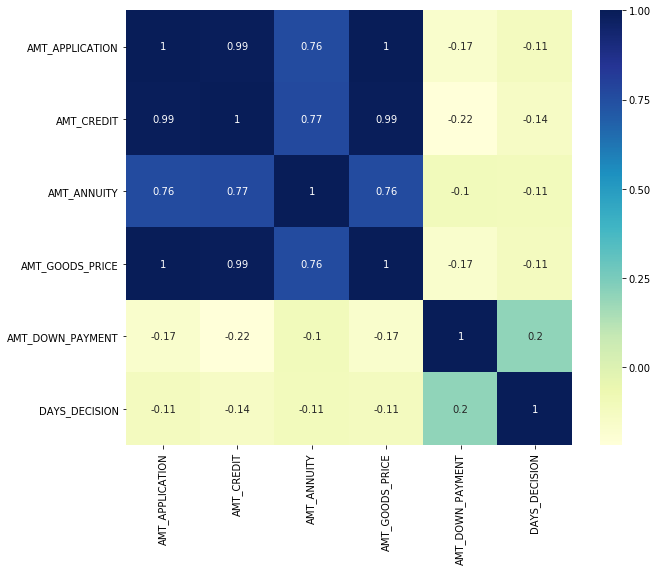

In [190]:
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(cor_prev_refuamt, cmap="YlGnBu", annot=True)
plt.show()

### Splitting previous application dataset which cancelled or not taken by client ###

In [204]:
prev_cancel_df= prev_cleaned_df.loc[(prev_cleaned_df['NAME_CONTRACT_STATUS'].isin(['Canceled', 'Unused offer']))].copy()
prev_cancel_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,WEEKDAY
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Canceled,14,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN,WEEKDAY
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Canceled,21,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN,WEEKDAY
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,386,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN,WEEKDAY
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,57,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN,WEEKEND
24,1555330,199353,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,6,Y,1,NaN,NaN,NaN,XNA,Canceled,202,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN,WEEKEND


#### Perform bivariate analysis to find the correlation between categorical variables ####

#### Distribution On total population ####

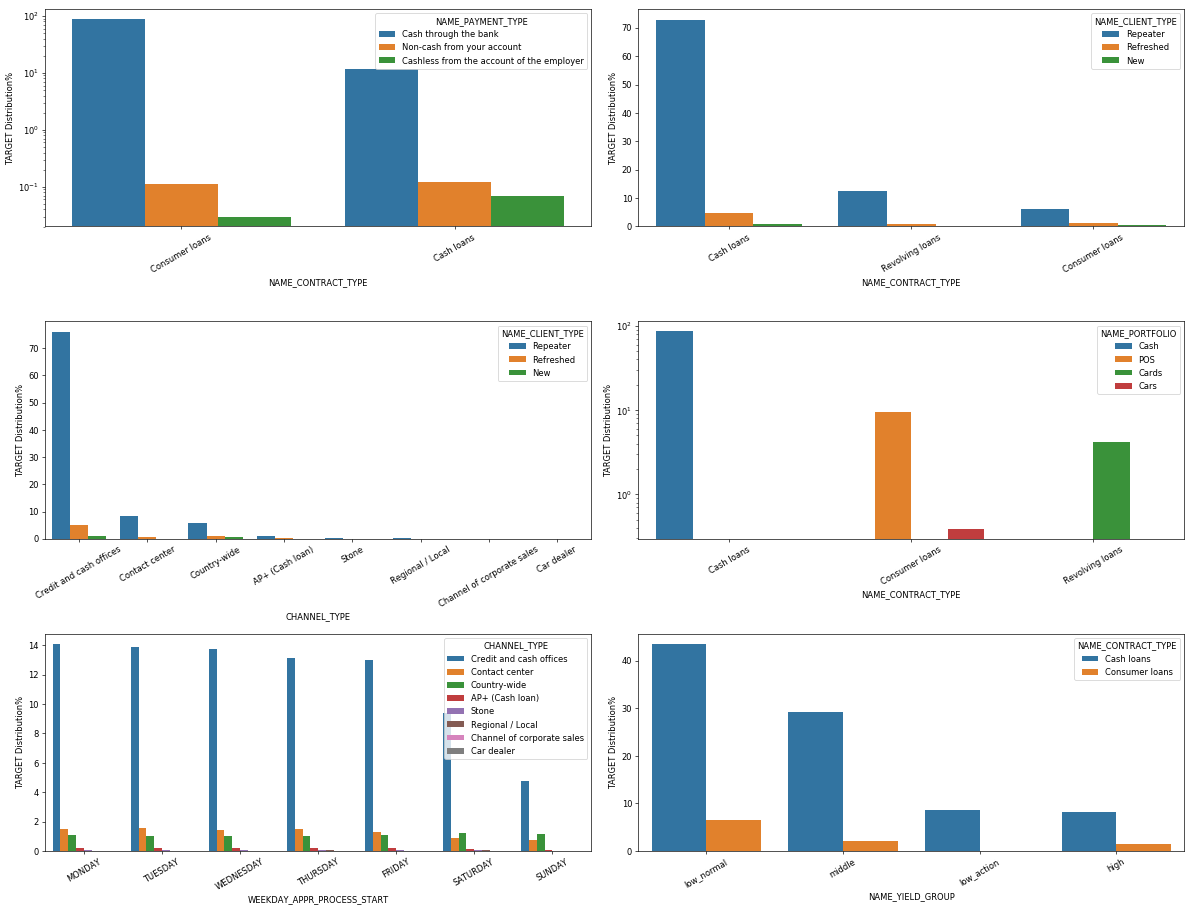

In [196]:
#i=len(list(categorical_df.columns)[1:])
j=0

plt.figure(figsize=(20,30), dpi=60)
plt.figure(1)
for column_list in bi_cat_list:
    j+=1  
    
    plt.subplot(6, 2, j)
    
    #Remove "XNA" value from column runtime before plotting distribution
    prev_cancel_df1= prev_cancel_df.loc[(prev_cancel_df[column_list[0]] != 'XNA') & (prev_cancel_df[column_list[1]] != 'XNA')]
    
    sns.barplot(y='SK_ID_PREV', x=column_list[0], hue=column_list[1]
                , data=pd.DataFrame(round(prev_cancel_df1.groupby(column_list[:2]).SK_ID_PREV.count()/len(prev_cancel_df1.index)*100,2))
                .sort_values(by=['SK_ID_PREV'], ascending=False).reset_index())
    
    plt.ylabel('TARGET Distribution%')
    plt.xticks(rotation=390)
    
    #use log scale for given parameters
    if column_list[2]=='Y':
        plt.yscale('log')
        
    #plt.title(column)

plt.tight_layout()
plt.show()

##### Distribution on particular class or type of population #####

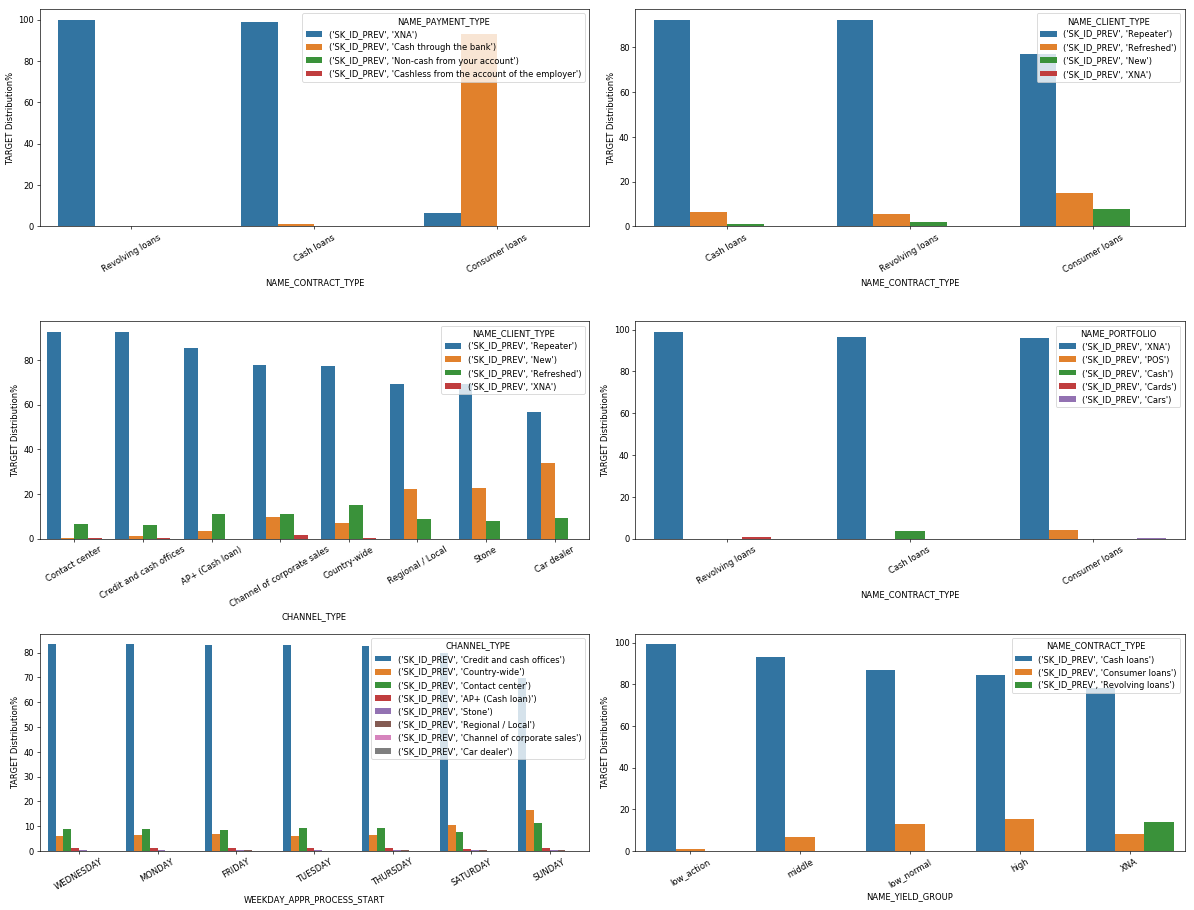

In [228]:
#i=len(list(categorical_df.columns)[1:])
j=0

plt.figure(figsize=(20,30), dpi=60)
plt.figure(1)
for column_list in bi_cat_list:
    j+=1  
    
    plt.subplot(6, 2, j)
    
    pivot_cancldf1= prev_cancel_df.pivot_table(index=column_list[0], columns=column_list[1]
                                          , values=['SK_ID_PREV'], aggfunc=len, margins=True, dropna=True, fill_value=0)
    pivot_cancldf2= pd.DataFrame(round(pivot_cancldf1.div( pivot_cancldf1.iloc[:,-1], axis=0 )*100,2).to_records()).iloc[:-1, :-1]

    pivot_cancldf3= pivot_cancldf2.melt(id_vars=column_list[0], var_name=column_list[1], value_name="Target")

    sns.barplot(y='Target', x=column_list[0], hue=column_list[1]
                , data=pd.DataFrame(pivot_cancldf3.groupby(column_list[:2]).Target.mean())
                .sort_values(by=['Target'], ascending=False).reset_index())
    
    plt.ylabel('TARGET Distribution%')
    plt.xticks(rotation=390)
    #plt.yscale('log')
    #plt.title(column)

plt.tight_layout()
plt.show()

#### Perform bivariate analysis to find the correlation between numerical variables ####

##### Identifying Outliers and removing them at the time of plotting #####

In [197]:
print('90th percentile value of Loan application amount is {0}'.format(prev_cancel_df['AMT_APPLICATION'].quantile(0.9)))
print('90th percentile value of Loan annuity is {0}'.format(prev_cancel_df['AMT_ANNUITY'].quantile(0.9)))
print('90th percentile value of Credit amount is {0}'.format(prev_cancel_df['AMT_CREDIT'].quantile(0.9)))
print('90th percentile value of price of the goods is {0}'.format(prev_cancel_df['AMT_GOODS_PRICE'].quantile(0.90)))
print('90th percentile value of down payment amount is {0}'.format(prev_cancel_df['AMT_DOWN_PAYMENT'].quantile(0.90)))

90th percentile value of Loan application amount is 24475.5
90th percentile value of Loan annuity is 52788.78
90th percentile value of Credit amount is 24480.0
90th percentile value of price of the goods is 697500.0
90th percentile value of down payment amount is 0.0


##### Find correlation between 1st set of selective variables #####

In [198]:
prev_canclamt_df= prev_cancel_df[['AMT_APPLICATION', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'AMT_DOWN_PAYMENT', 'DAYS_DECISION']].copy()

#Filtering out outliers with 90th quantile value
prev_canclamt_df= prev_canclamt_df.loc[(prev_canclamt_df['AMT_APPLICATION'] <= prev_refuamt_df['AMT_APPLICATION'].quantile(0.9))
                               & (prev_canclamt_df['AMT_CREDIT'] <= prev_refuamt_df['AMT_CREDIT'].quantile(0.9))
                               & (prev_canclamt_df['AMT_ANNUITY'] <= prev_refuamt_df['AMT_ANNUITY'].quantile(0.9))
                               & (prev_canclamt_df['AMT_GOODS_PRICE'] <= prev_refuamt_df['AMT_GOODS_PRICE'].quantile(0.9))
                               & (prev_canclamt_df['AMT_DOWN_PAYMENT'] <= prev_refuamt_df['AMT_DOWN_PAYMENT'].quantile(0.9))
                              ]

# pairplot
# sns.pairplot(prev_appramt_df)
# plt.show()

In [199]:
cor_prev_camclamt = prev_canclamt_df.corr()
round(cor_prev_camclamt, 3)

,AMT_APPLICATION,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AMT_DOWN_PAYMENT,DAYS_DECISION
AMT_APPLICATION,1.000,0.997,0.825,1.000,-0.173,-0.145
AMT_CREDIT,0.997,1.000,0.829,0.997,-0.192,-0.137
AMT_ANNUITY,0.825,0.829,1.000,0.825,-0.144,-0.155
AMT_GOODS_PRICE,1.000,0.997,0.825,1.000,-0.173,-0.145
AMT_DOWN_PAYMENT,-0.173,-0.192,-0.144,-0.173,1.000,0.503
DAYS_DECISION,-0.145,-0.137,-0.155,-0.145,0.503,1.000


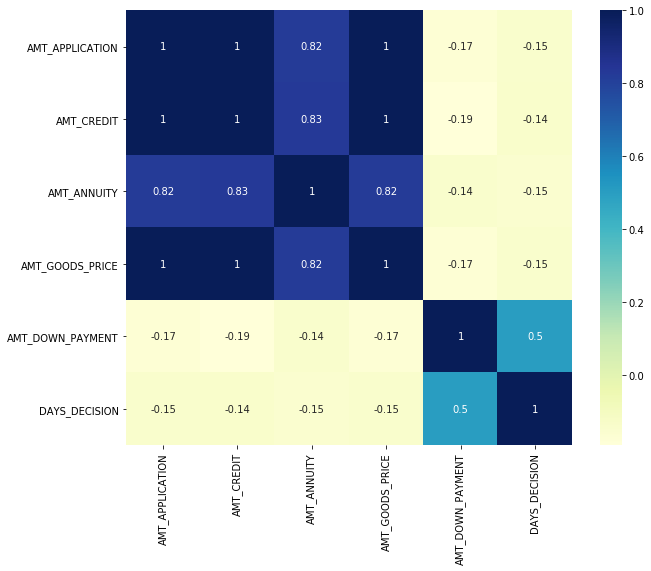

In [200]:
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(cor_prev_camclamt, cmap="YlGnBu", annot=True)
plt.show()

##### Find correlation between 2nd set of selective variables #####

### Analysing current and previous application dataset together ###

In [229]:
prev_application_df.columns= prev_application_df.columns.map(lambda x: 'PREV_'+str(x))

#Joining current application and previous application datasets
joined_df= pd.merge(application_df, prev_application_df, how= 'left', left_on="SK_ID_CURR", right_on="PREV_SK_ID_CURR")

In [230]:
joined_df.shape

(1430155, 159)

In [231]:
joined_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,PREV_SK_ID_PREV,PREV_SK_ID_CURR,PREV_NAME_CONTRACT_TYPE,PREV_AMT_ANNUITY,PREV_AMT_APPLICATION,PREV_AMT_CREDIT,PREV_AMT_DOWN_PAYMENT,PREV_AMT_GOODS_PRICE,PREV_WEEKDAY_APPR_PROCESS_START,PREV_HOUR_APPR_PROCESS_START,PREV_FLAG_LAST_APPL_PER_CONTRACT,PREV_NFLAG_LAST_APPL_IN_DAY,PREV_RATE_DOWN_PAYMENT,PREV_RATE_INTEREST_PRIMARY,PREV_RATE_INTEREST_PRIVILEGED,PREV_NAME_CASH_LOAN_PURPOSE,PREV_NAME_CONTRACT_STATUS,PREV_DAYS_DECISION,PREV_NAME_PAYMENT_TYPE,PREV_CODE_REJECT_REASON,PREV_NAME_TYPE_SUITE,PREV_NAME_CLIENT_TYPE,PREV_NAME_GOODS_CATEGORY,PREV_NAME_PORTFOLIO,PREV_NAME_PRODUCT_TYPE,PREV_CHANNEL_TYPE,PREV_SELLERPLACE_AREA,PREV_NAME_SELLER_INDUSTRY,PREV_CNT_PAYMENT,PREV_NAME_YIELD_GROUP,PREV_PRODUCT_COMBINATION,PREV_DAYS_FIRST_DRAWING,PREV_DAYS_FIRST_DUE,PREV_DAYS_LAST_DUE_1ST_VERSION,PREV_DAYS_LAST_DUE,PREV_DAYS_TERMINATION,PREV_NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1038818.0,100002.0,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9.0,Y,1.0,0.000000,NaN,NaN,XAP,Approved,-606.0,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS 

In [236]:
#Derived variable for analysis
joined_df["PREV_LOAN_FLAG"]= joined_df["PREV_SK_ID_CURR"].apply(lambda x: "Y" if x>0 else "N")

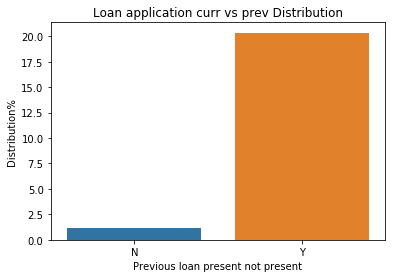

In [233]:
sns.barplot(y='SK_ID_CURR', x='PREV_LOAN_FLAG', data=pd.DataFrame(round(joined_df.groupby('PREV_LOAN_FLAG').SK_ID_CURR.nunique()
                                                                 /len(joined_df.index)*100,2)).sort_values(by=['SK_ID_CURR'], ascending=True).reset_index())
plt.ylabel('Distribution%')
plt.xlabel('Previous loan present not present')
plt.title('Loan application curr vs prev Distribution')
plt.show()

In [234]:
prev_present_df = joined_df.copy()

#Removing records which are not linked to any previous application records
prev_present_df = prev_present_df[~np.isnan(prev_present_df['PREV_SK_ID_CURR'])]
#round((prev_present_df['PREV_SK_ID_CURR'].isnull().sum()/len(prev_present_df.index))*100,4)

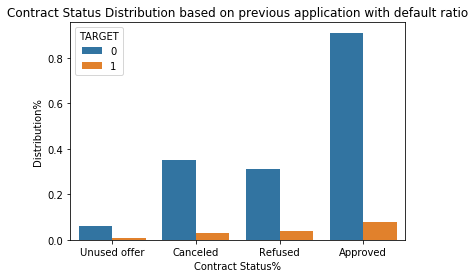

In [235]:
total_curr_appl= len(prev_present_df.SK_ID_CURR.unique())
#print(total_curr_appl)

sns.barplot(y='SK_ID_CURR', x='PREV_NAME_CONTRACT_STATUS', hue='TARGET', data=pd.DataFrame(round(prev_present_df.groupby(['PREV_NAME_CONTRACT_STATUS', 'TARGET']).SK_ID_CURR.nunique()
                                                                 /total_curr_appl,2)).sort_values(by=['SK_ID_CURR'], ascending=True).reset_index())
plt.ylabel('Distribution%')
plt.xlabel('Contract Status%')
plt.title('Contract Status Distribution based on previous application with default ratio')
plt.show()